# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 65.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape


(1898, 9)

#### Observations: 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: int64, int64, object, object, float64, float64, object, object, int64, int64


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: No missing value


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: food preparation time: mean = 27.37, minimum = 20.00, maximum = 35.00

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here

df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations: 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Write the code here
print (f"Unique Order: {df['order_id'].nunique()}")
print (f"Unique Customer: {df['customer_id'].nunique()}")
print (f"Unique Restaurant: {df['restaurant_name'].nunique()}")
print (f"Unique Cuisine: {df['cuisine_type'].nunique()}")





Unique Order: 1898
Unique Customer: 1200
Unique Restaurant: 178
Unique Cuisine: 14


<Axes: xlabel='cuisine_type', ylabel='count'>

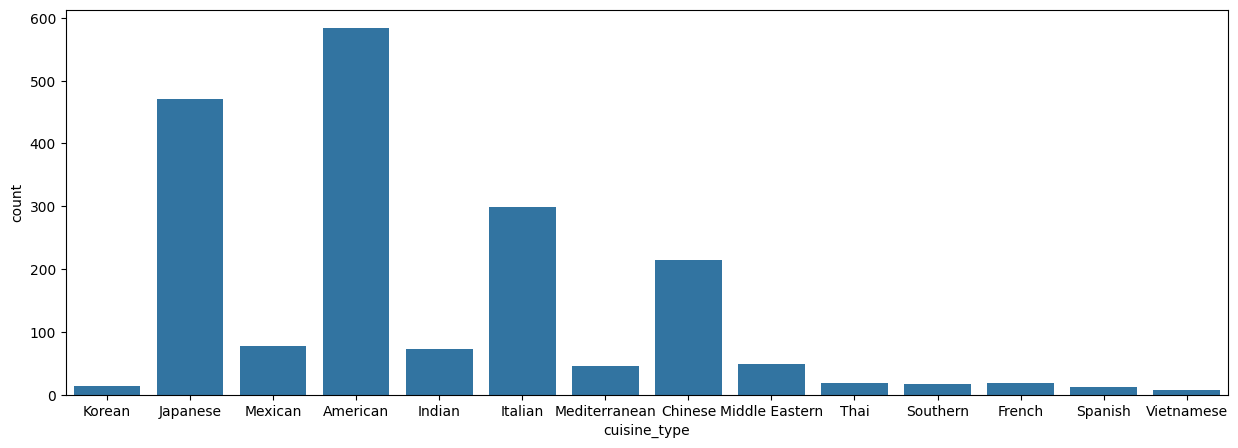

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

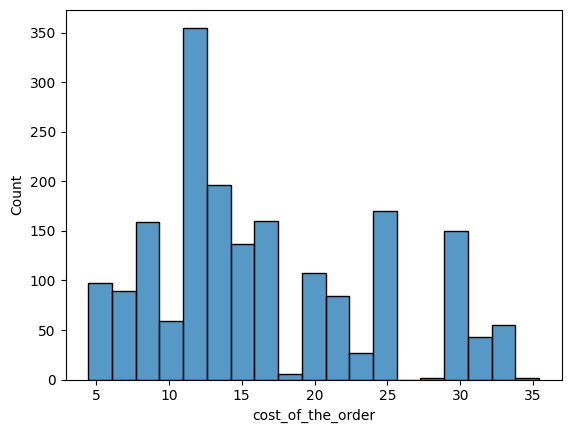

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()

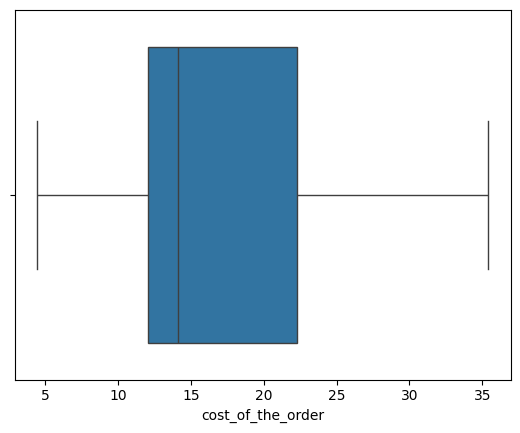

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

In [ ]:
# # Check the unique values
df['day_of_the_week'].nunique()

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

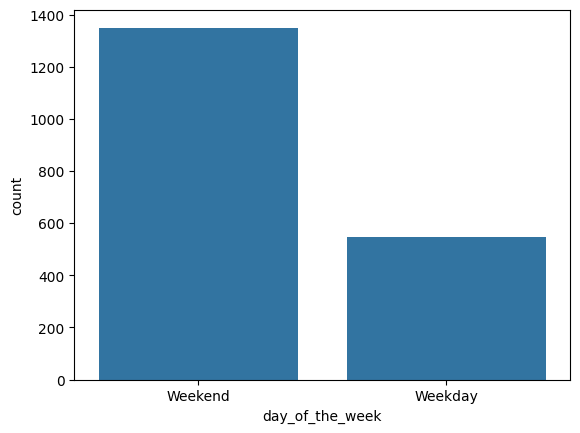

In [ ]:

sns.countplot(data = df, x = 'day_of_the_week') ## code to plot a bar graph for 'day_of_the_week' column

In [ ]:
#Check the unique values
df['rating'].nunique()

4

<Axes: xlabel='rating', ylabel='count'>

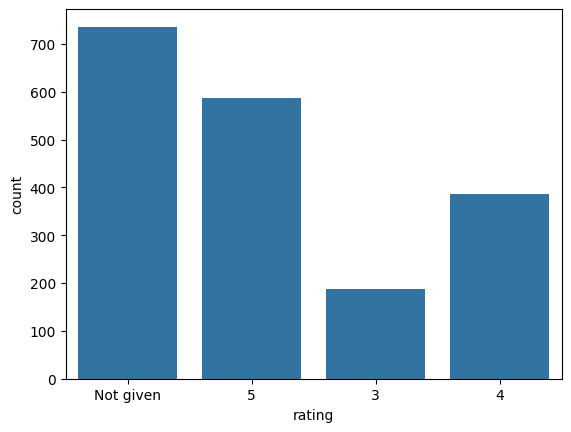

In [ ]:
## code to plot bar graph for 'rating' column
sns.countplot(data = df, x = 'rating')

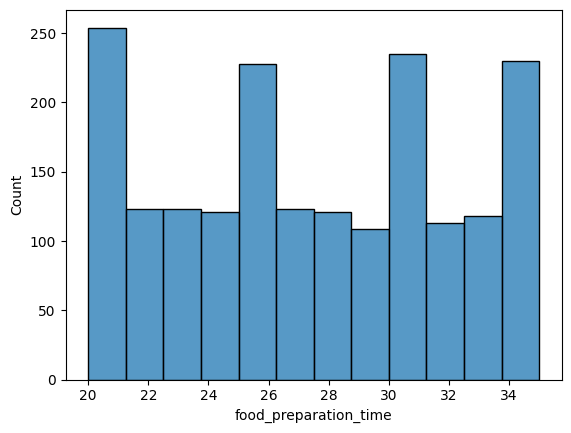

In [ ]:
# histogram of food_preparation_time
sns.histplot(data=df,x='food_preparation_time')
plt.show()


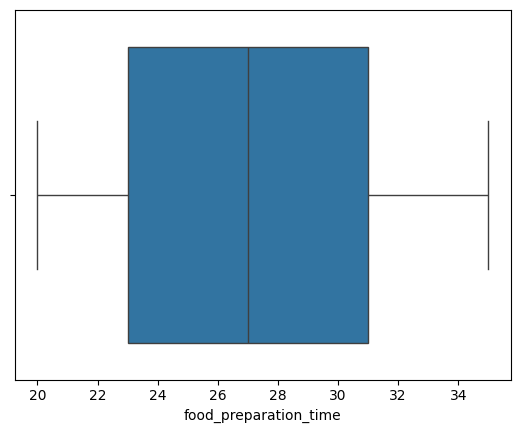

In [ ]:
# boxplot of food_preparation_time
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

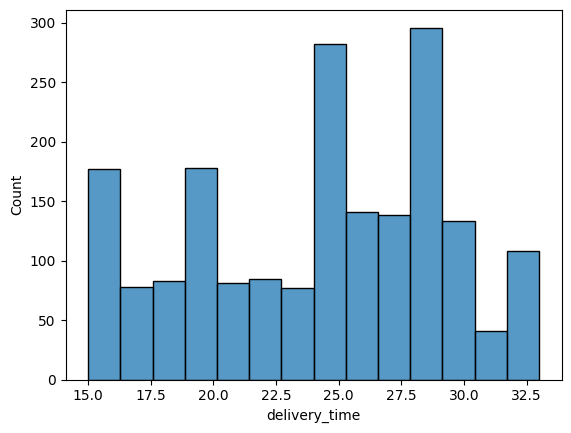

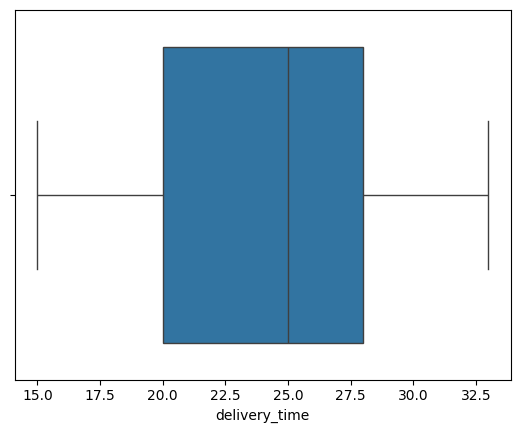

In [ ]:
# Histogram of delivery time
sns.histplot(data=df,x='delivery_time')
plt.show()

# boxplot of delivery time
sns.boxplot(data=df,x='delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5)


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# Filter weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Find most popular cuisine on weekends
popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().idxmax()

print("Most Popular Cuisine on Weekends:", popular_cuisine_weekend)

Most Popular Cuisine on Weekends: American


#### Observations: American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# Total orders
total_orders = len(df)

# Orders costing more than $20
orders_above_20 = len(df[df['cost_of_the_order'] > 20])

# Percentage calculation
percentage_above_20 = (orders_above_20 / total_orders) * 100

print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")

Percentage of orders costing more than $20: 29.24%


#### Observations: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()

print(f"Mean Order Delivery Time: {mean_delivery_time:.2f} minutes")

Mean Order Delivery Time: 24.16 minutes


#### Observations: 24.16 mins


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Top 3 most frequent customers
top_3_customers = df['customer_id'].value_counts().head(3)

print("Top 3 Customers (eligible for 20% discount vouchers):")
print(top_3_customers)

Top 3 Customers (eligible for 20% discount vouchers):
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: customer id 52832 had 13 orders, 47440 had 10 orders and 83287 had 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


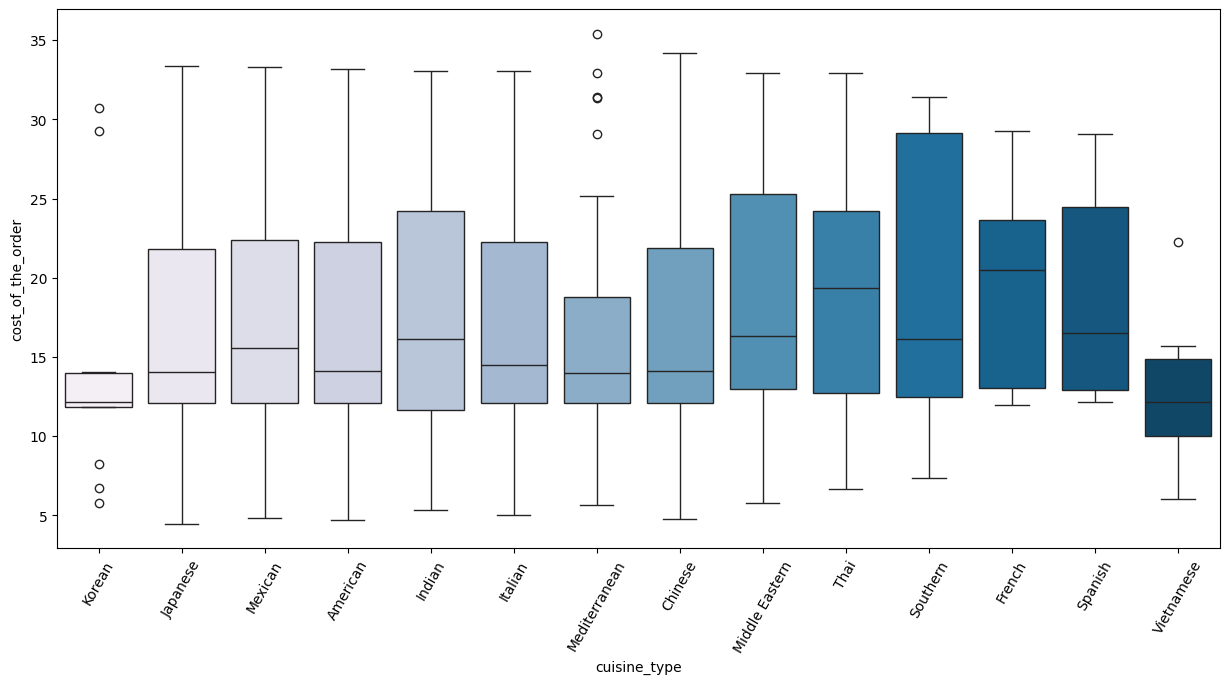

In [ ]:
# Write the code here

# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

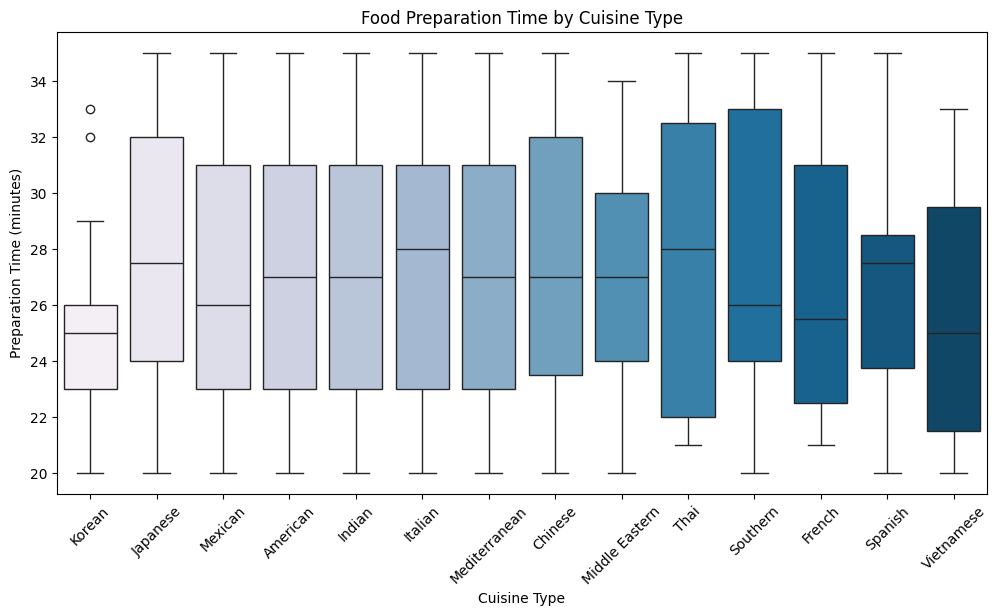

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time',palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation=45)
plt.title("Food Preparation Time by Cuisine Type")
plt.ylabel("Preparation Time (minutes)")
plt.xlabel("Cuisine Type")
plt.show()

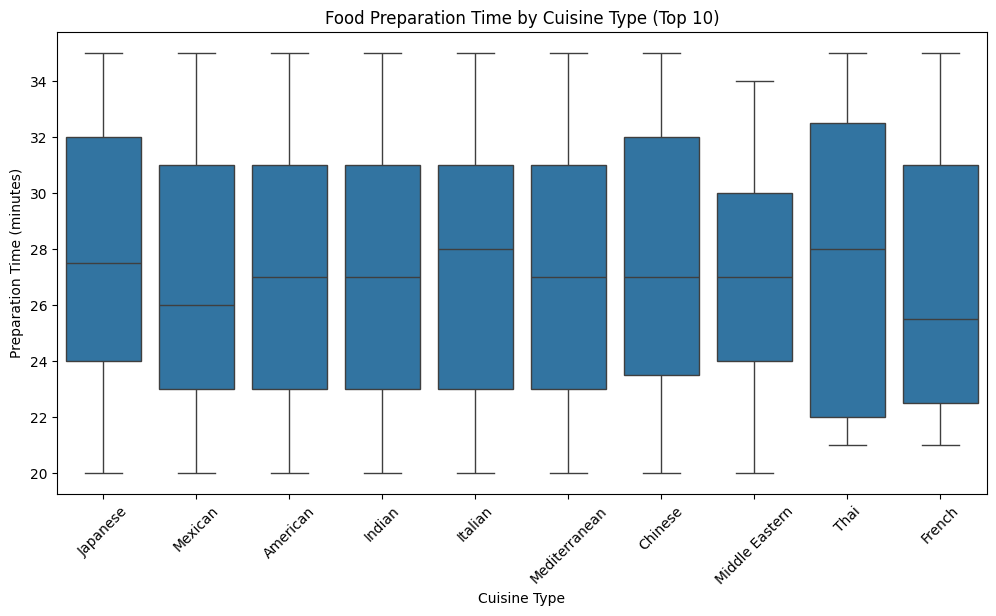

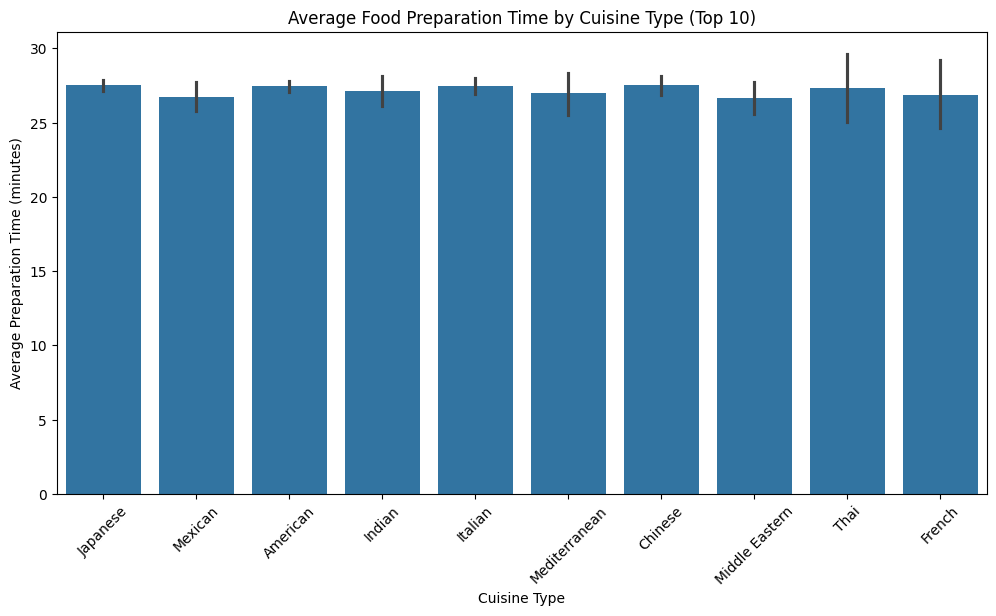

In [ ]:
# Focus on top 10 cuisines for readability
top_cuisines = df['cuisine_type'].value_counts().head(10).index
subset = df[df['cuisine_type'].isin(top_cuisines)]

# Boxplot: Cuisine type vs Food preparation time
plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=45)
plt.title("Food Preparation Time by Cuisine Type (Top 10)")
plt.ylabel("Preparation Time (minutes)")
plt.xlabel("Cuisine Type")
plt.show()

# Barplot: Average preparation time per cuisine
plt.figure(figsize=(12,6))
sns.barplot(data=subset, x='cuisine_type', y='food_preparation_time', estimator='mean')
plt.xticks(rotation=45)
plt.title("Average Food Preparation Time by Cuisine Type (Top 10)")
plt.ylabel("Average Preparation Time (minutes)")
plt.xlabel("Cuisine Type")
plt.show()

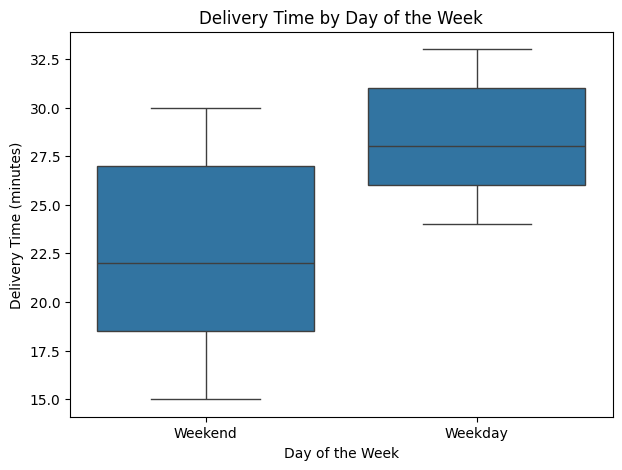

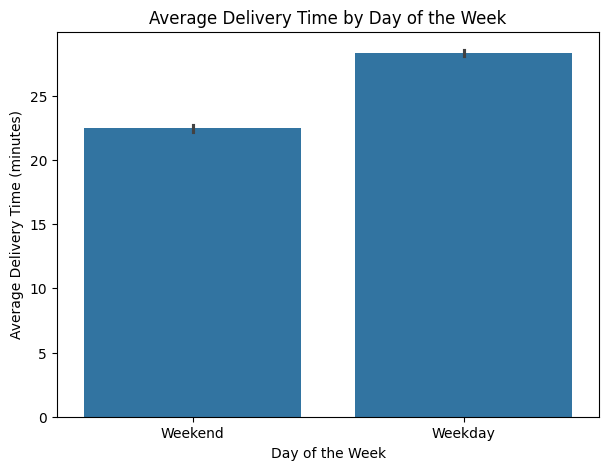

In [ ]:
# Relationship between day of the week and delivery time
# Boxplot: Day of the week vs Delivery time
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title("Delivery Time by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# Barplot: Average delivery time by day of the week
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='day_of_the_week', y='delivery_time', estimator='mean')
plt.title("Average Delivery Time by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

In [ ]:
# Run the below code and write your observations on the revenue generated by the restaurants.

df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


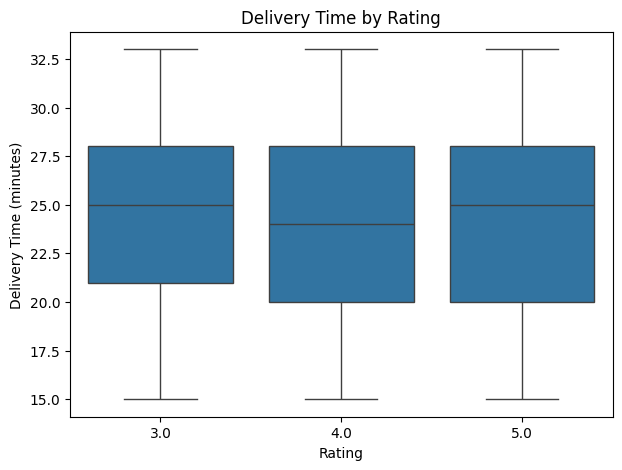

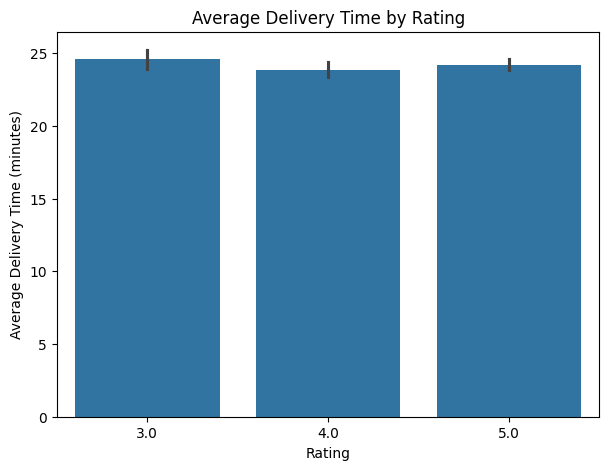

In [ ]:
# Relationship between rating and delivery time
# Clean ratings (convert 'Not given' to NaN and drop them)
df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce')
subset = df.dropna(subset=['rating_clean'])

# Boxplot: Delivery time distribution by rating
plt.figure(figsize=(7,5))
sns.boxplot(data=subset, x='rating_clean', y='delivery_time')
plt.title("Delivery Time by Rating")
plt.xlabel("Rating")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# Barplot: Average delivery time by rating
plt.figure(figsize=(7,5))
sns.barplot(data=subset, x='rating_clean', y='delivery_time', estimator=np.mean)
plt.title("Average Delivery Time by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

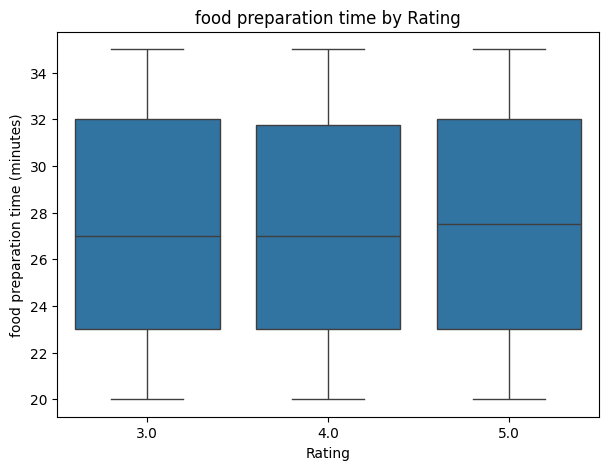

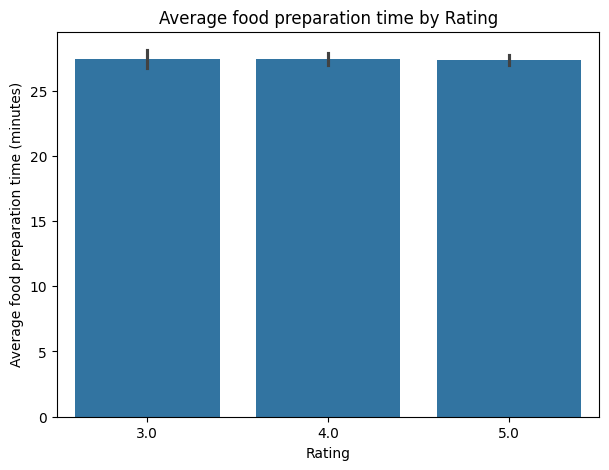

In [ ]:
# Relationship between rating and food preparation time
# Clean ratings (convert 'Not given' to NaN and drop them)
df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce')
subset = df.dropna(subset=['rating_clean'])

# Boxplot: food preparation time distribution by rating
plt.figure(figsize=(7,5))
sns.boxplot(data=subset, x='rating_clean', y='food_preparation_time')
plt.title("food preparation time by Rating")
plt.xlabel("Rating")
plt.ylabel("food preparation time (minutes)")
plt.show()

# Barplot: Average food preparation time by rating
plt.figure(figsize=(7,5))
sns.barplot(data=subset, x='rating_clean', y='food_preparation_time', estimator=np.mean)
plt.title("Average food preparation time by Rating")
plt.xlabel("Rating")
plt.ylabel("Average food preparation time (minutes)")
plt.show()

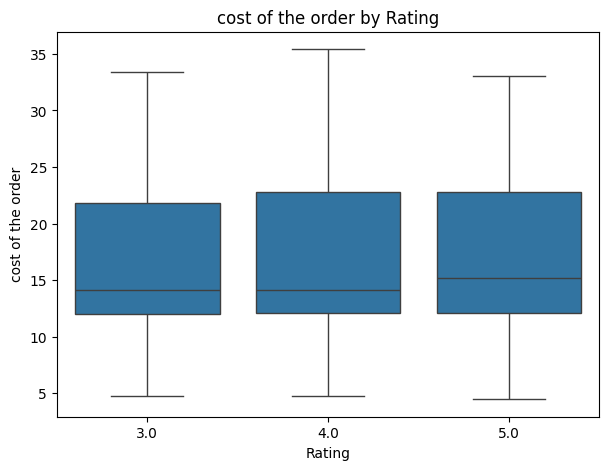

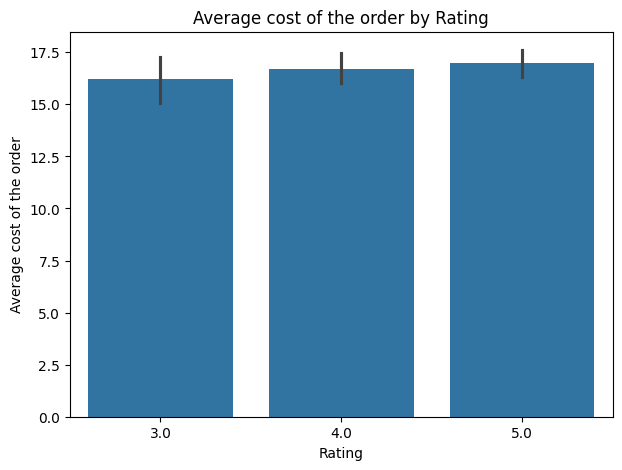

In [ ]:
# Relationship between rating and cost of the order
# Clean ratings (convert 'Not given' to NaN and drop them)
df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce')
subset = df.dropna(subset=['rating_clean'])

# Boxplot: cost of the order distribution by rating
plt.figure(figsize=(7,5))
sns.boxplot(data=subset, x='rating_clean', y='cost_of_the_order')
plt.title("cost of the order by Rating")
plt.xlabel("Rating")
plt.ylabel("cost of the order")
plt.show()

# Barplot: Average cost of the order by rating
plt.figure(figsize=(7,5))
sns.barplot(data=subset, x='rating_clean', y='cost_of_the_order', estimator=np.mean)
plt.title("Average cost of the order by Rating")
plt.xlabel("Rating")
plt.ylabel("Average cost of the order")
plt.show()

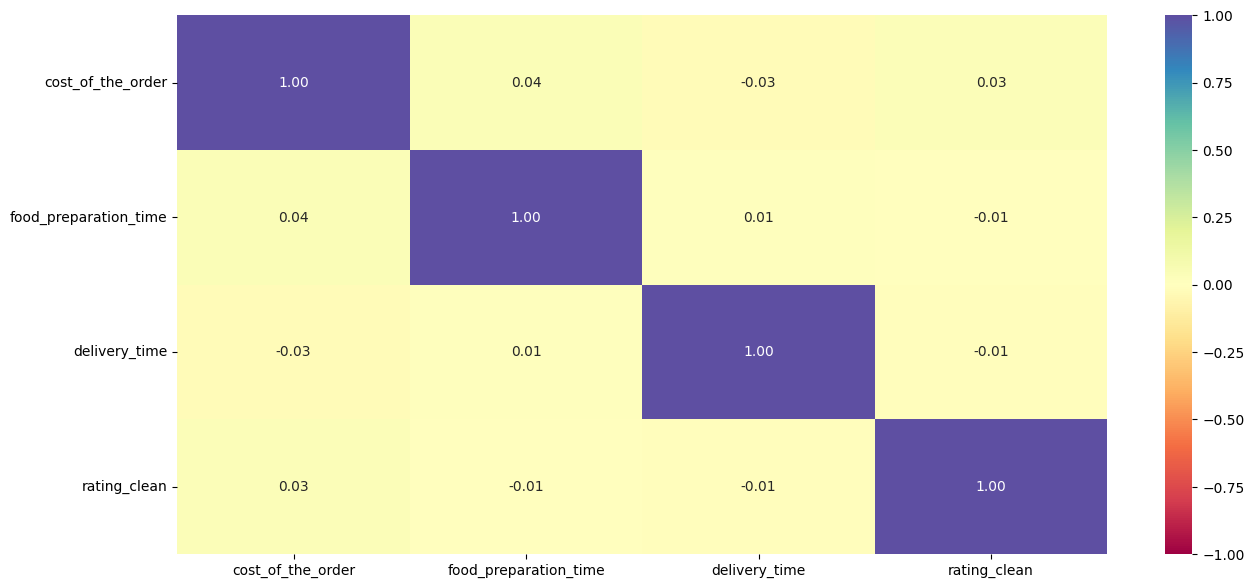

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating_clean']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Clean ratings (convert 'Not given' to NaN)
df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce')

# Filter out rows with valid numeric ratings
ratings_df = df.dropna(subset=['rating_clean'])

# Group by restaurant: count of ratings and average rating
restaurant_ratings = ratings_df.groupby('restaurant_name')['rating_clean'].agg(['count', 'mean']).reset_index()

# Apply conditions: rating count > 50 and average rating > 4
promo_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

print("Restaurants eligible for promotional offer:")
print(promo_restaurants)

Restaurants eligible for promotional offer:
               restaurant_name  count      mean
16   Blue Ribbon Fried Chicken     64  4.328125
17           Blue Ribbon Sushi     73  4.219178
117                Shake Shack    133  4.278195
132          The Meatball Shop     84  4.511905


#### Observations:
Here are the restaurants that qualify for the promotional offer (rating count > 50 and average rating > 4):

Blue Ribbon Fried Chicken — 64 ratings, avg 4.33

Blue Ribbon Sushi — 73 ratings, avg 4.22

Shake Shack — 133 ratings, avg 4.28

The Meatball Shop — 84 ratings, avg 4.51

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# Define commission rules
def commission(cost):
    if cost > 20:
        return cost * 0.25   # 25% commission
    elif cost > 5:
        return cost * 0.15   # 15% commission
    else:
        return 0             # No commission for orders ≤ 5

# Apply commission calculation to each order
df['revenue'] = df['cost_of_the_order'].apply(commission)

# Total revenue across all orders
net_revenue = df['revenue'].sum()

print(f"Net revenue generated by the company: ${net_revenue:.2f}")

Net revenue generated by the company: $6166.30


#### Observations: $6,166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Compute total time (prep + delivery)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count total orders
total_orders = len(df)

# Count orders with total time > 60 minutes
long_orders = len(df[df['total_time'] > 60])

# Percentage calculation
percentage_long_orders = (long_orders / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_long_orders:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


## Observations: Percentage of orders taking more than 60 minutes: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
mean_delivery = df.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean Delivery Time (Weekday vs Weekend):")
print(mean_delivery)

Mean Delivery Time (Weekday vs Weekend):
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
Mean Delivery Time (Weekday vs Weekend):
day_of_the_week
Weekday    28.340037
Weekend    22.470022

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Order Costs & Revenue

Most orders fall in the $10–$30 range. The company earns higher revenue from orders > $20, thanks to the 25% commission rule. Net revenue across all orders is ~$6,166.

* Customer Behavior

Top customers are repeat buyers (e.g., Customer ID 52832 placed 13 orders).
A small portion of loyal customers contributes significantly to sales volume.

* Cuisine Preferences

American, Japanese, and Mexican cuisines dominate in terms of popularity.
Weekends show higher demand for diverse cuisines, while weekdays are more consistent with core favorites.

* Ratings & Customer Satisfaction

High-rated restaurants (e.g., The Meatball Shop, Shake Shack, Blue Ribbon Sushi) consistently score >4.2 on average. Ratings are not strongly correlated with cost, prep, or delivery times, suggesting that food quality and taste drive ratings more than logistics. However, very long delivery times (>60 min) negatively impact ratings, even if only a small percentage of orders are affected.

* Delivery Insights

Mean delivery times are fairly consistent across weekdays and weekends, but outliers exist on weekends, likely due to peak demand. Prep time and delivery time show a weak correlation, meaning restaurant efficiency varies by cuisine and kitchen setup.

### Recommendations:

*  Promote High-Performing Restaurants

Focus promotional campaigns on restaurants with high order counts and strong ratings (e.g., Shake Shack, The Meatball Shop).
Offer special deals on weekends to capitalize on higher traffic.

* Encourage Loyalty

Provide discount vouchers or loyalty rewards to top customers (e.g., repeat buyers with >10 orders).

* Targeted Cuisine Marketing

Highlight popular cuisines (American, Japanese, Mexican) in ads.
Also promote underrated but high-rated cuisines on weekends to diversify customer interest.

* Improve Delivery Efficiency

Monitor restaurants with frequent prep + delivery times > 60 minutes and work with them to streamline processes. Consider incentives for restaurants that consistently deliver under 30 minutes.

* Leverage Customer Feedback

Encourage customers to leave ratings after each order. Analyze low-rated restaurants and identify common issues (long prep, inconsistent food quality). Provide restaurant training/feedback sessions to improve.

---